In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import calendar

cwd = os.getcwd()
#print(cwd)

In [2]:
# Load the CSV data into a Pandas DataFrame
data = pd.read_csv('clean_median_sale_price_v2_df.csv', index_col=0)
data.head()

,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,"New York, NY",NY,344911.0,339350.0,335350.0,333517.0,342000.0,356000.0,371000.0,380667.0,...,543333.0,528333.0,518333.0,515333.0,509500.0,510333.0,516667.0,535833.0,558333.0,579667.0
1,"Los Angeles, CA",CA,394000.0,397333.0,407333.0,430667.0,450667.0,465000.0,468333.0,471667.0,...,852000.0,840333.0,827000.0,818333.0,816667.0,827333.0,839000.0,854000.0,873333.0,888333.0
2,"Chicago, IL",IL,162833.0,158000.0,160218.0,170218.0,183385.0,197833.0,207500.0,212333.0,...,285000.0,278333.0,273333.0,270000.0,269000.0,275633.0,287300.0,300300.0,313167.0,319833.0
3,"Dallas, TX",TX,151667.0,152167.0,155333.0,164500.0,172800.0,178467.0,181633.0,181125.0,...,390500.0,382500.0,373333.0,363333.0,362333.0,367000.0,377000.0,384667.0,395000.0,400333.0
4,"Houston, TX",TX,149833.0,148572.0,150405.0,160155.0,167417.0,174900.0,177650.0,178650.0,...,321000.0,316000.0,310667.0,306000.0,304333.0,306333.0,313333.0,321667.0,328667.0,333667.0


In [3]:
# Author: anderoos
# This script is meant to break up Zillow Data from the continental US into five distinct regions
# West, Midwest, Southwest, Southeast, Northeast
def split_regions(df):
    df['StateName'] = df['StateName'].astype('str')
    # Define categories
    northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']
    southeast = ['DE', 'MD', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'LA', 'KY', 'TN']
    midwest = ['OH', 'IN', 'IL', 'MI', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
    west = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'CA', 'OR', 'WA', 'AK', 'HI']
    southwest = ['TX', 'OK', 'AR']
    # Filters state codes into separate dataframes
    ne_df = df[df['StateName'].isin(northeast)]
    se_df = df[df['StateName'].isin(southeast)]
    mw_df = df[df['StateName'].isin(midwest)]
    w_df = df[df['StateName'].isin(west)]
    sw_df = df[df['StateName'].isin(southwest)]
    return ne_df, se_df, mw_df, w_df, sw_df

In [4]:
# Split the data into regions
ne_df, se_df, mw_df, w_df, sw_df = split_regions(data)

In [5]:
w_df.head()

,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
1,"Los Angeles, CA",CA,394000.0,397333.0,407333.0,430667.0,450667.0,465000.0,468333.0,471667.0,...,852000.0,840333.0,827000.0,818333.0,816667.0,827333.0,839000.0,854000.0,873333.0,888333.0
10,"Phoenix, AZ",AZ,162667.0,163667.0,167667.0,174300.0,179967.0,184933.0,188335.0,188335.0,...,452483.0,442967.0,431633.0,422333.0,419667.0,424667.0,428667.0,434667.0,443000.0,446667.0
11,"San Francisco, CA",CA,405833.0,398500.0,411667.0,465000.0,516667.0,555000.0,565000.0,558333.0,...,1054333.0,1062667.0,1022667.0,963333.0,919833.0,953167.0,1013167.0,1073333.0,1110000.0,1116667.0
12,"Riverside, CA",CA,212333.0,214000.0,218333.0,226000.0,234000.0,239667.0,244667.0,246667.0,...,533333.0,520000.0,512500.0,504167.0,509167.0,511667.0,521667.0,528500.0,533500.0,535167.0
14,"Seattle, WA",WA,267713.0,266880.0,272483.0,289150.0,303817.0,312500.0,322500.0,322250.0,...,663333.0,651667.0,636667.0,618333.0,612333.0,619667.0,636333.0,662333.0,683000.0,694667.0


In [6]:
w_df_states = w_df.drop(columns=['RegionName'])
w_df_states = w_df_states.groupby('StateName').mean()
#w_df_states.to_csv("test.csv")
w_df_states

,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
StateName,,,,,,,,,,,,,,,,,,,,,
AZ,151945.333333,150320.333333,150731.888889,153111.555556,158783.777778,163719.444444,166756.666667,165846.333333,164592.111111,164959.666667,...,385012.222222,381314.222222,371600.222222,365123.222222,363447.222222,369987.888889,373992.555556,383427.888889,392433.333333,399531.555556
CA,257868.000000,258652.967742,262601.870968,276333.419355,289381.774194,297895.161290,300741.935484,302486.548387,303077.935484,304344.419355,...,594310.096774,586484.870968,575474.225806,563108.935484,557903.580645,566261.032258,580188.741935,596817.161290,606919.354839,614805.935484
CO,261803.000000,268980.428571,263938.857143,266736.714286,264705.142857,266670.642857,261371.785714,257221.142857,261678.000000,261086.642857,...,576136.071429,572578.500000,568419.571429,559916.642857,553392.071429,549631.571429,575710.714286,581235.785714,592245.285714,585315.571429
HI,381609.000000,378537.250000,383949.000000,392870.000000,397125.000000,401666.750000,389125.000000,401416.750000,393729.250000,393979.000000,...,757481.500000,780920.750000,783962.500000,775316.500000,751145.750000,750645.750000,748416.500000,776000.000000,791032.500000,833011.500000
ID,136498.750000,135767.500000,138450.750000,141229.250000,143127.250000,147106.500000,149787.500000,151075.000000,149729.250000,148087.000000,...,373524.750000,360033.500000,348187.500000,348362.500000,349479.000000,359366.750000,363074.750000,375450.250000,383450.000000,389733.250000
MT,180216.500000,177470.000000,184736.500000,190165.750000,196662.250000,200120.750000,205154.000000,207591.500000,203787.750000,198583.250000,...,454531.250000,448573.000000,440947.750000,441113.750000,437863.750000,444572.000000,440895.750000,447312.500000,461604.250000,468940.750000
NM,152093.900000,147111.500000,134656.500000,149886.600000,150805.000000,145808.200000,152424.000000,157541.000000,155397.400000,148886.800000,...,250867.200000,248466.600000,242100.000000,231626.000000,236586.200000,241079.600000,252813.200000,252686.600000,256926.600000,258766.800000
NV,150273.833333,153505.500000,158455.333333,165508.333333,171052.833333,173664.000000,179444.333333,180802.666667,181669.166667,177836.166667,...,465238.833333,460744.833333,441899.666667,432705.166667,425238.333333,429438.833333,427161.166667,426116.833333,442052.666667,453941.666667
OR,172318.733333,173893.733333,175974.333333,179333.266667,183370.000000,187817.800000,190758.866667,188784.400000,189331.000000,186433.266667,...,416593.266667,412478.266667,406550.400000,397220.533333,394407.800000,396111.000000,402412.266667,410477.866667,419169.533333,423865.666667


In [7]:
# Function to convert date columns to written form
def convert_to_month_name(col_name):
    month_num = int(col_name.split('/')[0])
    return calendar.month_name[month_num]

In [8]:
# Rename the columns to match the desired format
w_df_states_typedmonths = w_df_states.rename(columns=convert_to_month_name)
w_df_states_typedmonths.head()

,January,February,March,April,May,June,July,August,September,October,...,October,November,December,January,February,March,April,May,June,July
StateName,,,,,,,,,,,,,,,,,,,,,
AZ,151945.333333,150320.333333,150731.888889,153111.555556,158783.777778,163719.444444,166756.666667,165846.333333,164592.111111,164959.666667,...,385012.222222,381314.222222,371600.222222,365123.222222,363447.222222,369987.888889,373992.555556,383427.888889,392433.333333,399531.555556
CA,257868.000000,258652.967742,262601.870968,276333.419355,289381.774194,297895.161290,300741.935484,302486.548387,303077.935484,304344.419355,...,594310.096774,586484.870968,575474.225806,563108.935484,557903.580645,566261.032258,580188.741935,596817.161290,606919.354839,614805.935484
CO,261803.000000,268980.428571,263938.857143,266736.714286,264705.142857,266670.642857,261371.785714,257221.142857,261678.000000,261086.642857,...,576136.071429,572578.500000,568419.571429,559916.642857,553392.071429,549631.571429,575710.714286,581235.785714,592245.285714,585315.571429
HI,381609.000000,378537.250000,383949.000000,392870.000000,397125.000000,401666.750000,389125.000000,401416.750000,393729.250000,393979.000000,...,757481.500000,780920.750000,783962.500000,775316.500000,751145.750000,750645.750000,748416.500000,776000.000000,791032.500000,833011.500000
ID,136498.750000,135767.500000,138450.750000,141229.250000,143127.250000,147106.500000,149787.500000,151075.000000,149729.250000,148087.000000,...,373524.750000,360033.500000,348187.500000,348362.500000,349479.000000,359366.750000,363074.750000,375450.250000,383450.000000,389733.250000


In [9]:
# Combining the columns by month
w_df_combined_by_state = pd.DataFrame({
    "January": w_df_states_typedmonths[["January"]].mean(axis=1),
    "February": w_df_states_typedmonths[["February"]].mean(axis=1),
    "March": w_df_states_typedmonths[["March"]].mean(axis=1),
    "April": w_df_states_typedmonths[["April"]].mean(axis=1),
    "May": w_df_states_typedmonths[["May"]].mean(axis=1),
    "June": w_df_states_typedmonths[["June"]].mean(axis=1),
    "July": w_df_states_typedmonths[["July"]].mean(axis=1),
    "August": w_df_states_typedmonths[["August"]].mean(axis=1),
    "September": w_df_states_typedmonths[["September"]].mean(axis=1),
    "October": w_df_states_typedmonths[["October"]].mean(axis=1),
    "November": w_df_states_typedmonths[["November"]].mean(axis=1),
    "December": w_df_states_typedmonths[["December"]].mean(axis=1)  
})

w_df_combined_by_state.head()

,January,February,March,April,May,June,July,August,September,October,November,December
StateName,,,,,,,,,,,,
AZ,237332.828283,236865.676768,239099.808081,242157.040404,248241.636364,252621.414141,256983.777778,243240.166667,243830.155556,244922.077778,246340.722222,246658.266667
CA,413270.043988,413264.346041,419973.413490,431040.290323,440920.938416,448013.434018,450925.724340,435682.545161,434386.025806,433885.374194,433668.067742,431463.806452
CO,371128.058442,372224.084416,374090.220779,382992.051948,390507.006494,394242.240260,392750.636364,373391.721429,377689.007143,380166.057143,381350.721429,381510.300000
HI,541573.227273,541965.295455,548662.704545,554844.954545,560523.954545,564707.227273,567543.931818,543559.275000,543451.275000,545376.225000,550121.125000,552933.975000
ID,220961.795455,220837.295455,225885.022727,231548.818182,238278.022727,242677.818182,246198.181818,233646.450000,233196.675000,231922.500000,230950.675000,229795.900000


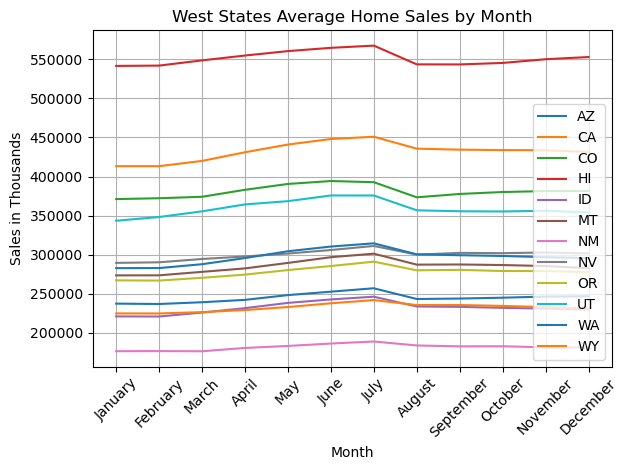

In [10]:
# Transpose rotates to graph data by states (instead of months)
df_transposed = w_df_combined_by_state.transpose()

for state in df_transposed.columns:
    plt.plot(df_transposed.index, df_transposed[state], label=state)

plt.title("West States Average Home Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales in Thousands")
plt.legend(loc="lower right")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Images/Months and Seasonality/West/W Avg by month.png")
plt.show()

In [11]:
df_seasons = df_transposed
df_seasons["Seasons"] = ["Winter","Winter", "Spring", "Spring", "Spring","Summer", "Summer","Summer", "Autumn","Autumn","Autumn","Winter"]
#df_seasons.reset_index()
df_seasons_grouped = df_seasons.groupby("Seasons").mean()
df_seasons_grouped = df_seasons_grouped.rename_axis('Seasons')
df_seasons_grouped 

StateName,AZ,CA,CO,HI,ID,MT,NM,NV,OR,UT,WA,WY
Seasons,,,,,,,,,,,,
Autumn,245030.985185,433979.822581,379735.261905,546316.208333,232023.283333,286521.433333,182266.973333,302332.900000,279538.375556,355646.188889,298138.796667,234252.466667
Spring,243166.161616,430644.880743,382529.759740,554677.204545,231903.954545,283281.696970,180053.681818,297848.444444,275048.143434,362732.050505,295935.257576,229515.333333
Summer,250948.452862,444873.901173,386794.866017,558603.478030,240840.816667,295080.166667,186298.158788,305708.616162,285484.629293,369411.325253,308426.878182,238381.396970
Winter,240285.590572,419332.732160,374954.147619,545490.832576,223864.996970,276560.720455,178075.751515,293759.147980,270547.865859,348536.639394,287055.426970,226854.036364


In [12]:
w_df_seasons = pd.DataFrame({
    "Avg by Season": df_seasons_grouped.mean(axis=1)})
w_df_seasons

,Avg by Season
Seasons,
Autumn,314648.557982
Spring,313944.714106
Summer,322571.057172
Winter,307109.824036


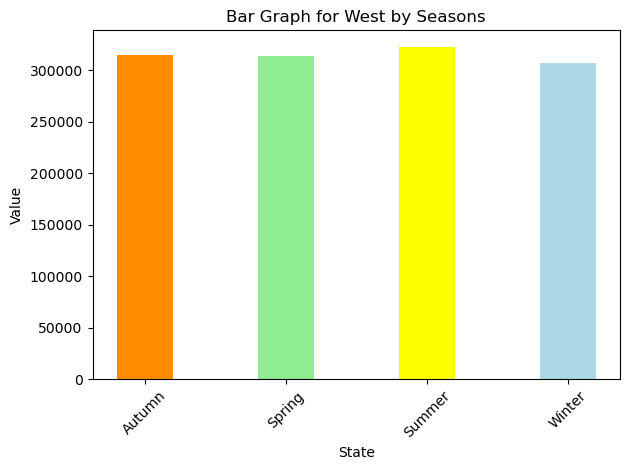

In [13]:
# Transpose the DataFrame for easier plotting
transpose_for_plotting = w_df_seasons.transpose()


# Define color mapping for each season
color_map = {
    'Autumn': 'darkorange',
    'Spring': 'lightgreen',
    'Summer': 'yellow',
    'Winter': 'lightblue'
}

# Create four bar graphs by season
#plt.figure(figsize=(7, 3))
for season in transpose_for_plotting.columns:
    plt.bar(season, transpose_for_plotting[season], color=color_map[season], label=season, width=0.4)

plt.title("Bar Graph for West by Seasons")
plt.xlabel('State')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.legend()
plt.savefig("Images/Months and Seasonality/West/W Avg by Seasons.png")
plt.show()
